In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_bvp
from scipy.integrate import solve_ivp
from scipy.linalg import eigh_tridiagonal
from scipy.sparse.linalg import eigs
import math

[[2.52638135e-04 1.45263285e-03 5.65791031e-03 1.74251499e-02
  4.49739350e-02]
 [3.74361154e-04 2.08091497e-03 7.87411633e-03 2.34945618e-02
  5.85286297e-02]
 [5.49693592e-04 2.96478464e-03 1.08974131e-02 3.14959748e-02
  7.57134026e-02]
 [7.99574272e-04 4.19028063e-03 1.49550169e-02 4.18500927e-02
  9.70305188e-02]
 [1.15147827e-03 5.86546311e-03 2.03156259e-02 5.50071664e-02
  1.22893334e-01]
 [1.64186824e-03 8.12655207e-03 2.72920340e-02 7.14287816e-02
  1.53601132e-01]
 [2.31861693e-03 1.11444525e-02 3.62571791e-02 9.16073677e-02
  1.89281301e-01]
 [3.24129939e-03 1.51206909e-02 4.76086567e-02 1.15976002e-01
  2.29812190e-01]
 [4.48498071e-03 2.02874805e-02 6.17600441e-02 1.44840285e-01
  2.74657962e-01]
 [6.14581779e-03 2.69273203e-02 7.91314283e-02 1.78373615e-01
  3.22846351e-01]
 [8.33932660e-03 3.53568220e-02 1.00165634e-01 2.16551367e-01
  3.72969443e-01]
 [1.12000706e-02 4.59112681e-02 1.25213949e-01 2.59055578e-01
  4.23188231e-01]
 [1.48904430e-02 5.89394461e-02 1.545129

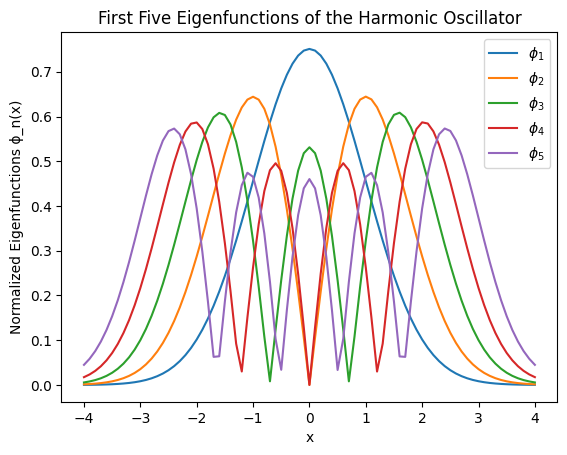

In [15]:
# Part a)
def bvp_rhs(x, y, epsilon):
    return [y[1], (x**2 - epsilon) * y[0]]

# Initialization
tol = 1e-4
col = ['r', 'b', 'g', 'c', 'm', 'k']
x_step = 0.1
L = 4
x_range = [-L, L]
xspan = np.arange(-L, L + x_step , x_step)
xrange = [xspan[0], xspan[-1]]
A = 1
epsilon_list = [0.2]
eps_fun = []

epsilon_start = epsilon_list[0]
for i in range (1, 6):
    epsilon = epsilon_start
    depsilon = 0.1
    y0 = [A, np.sqrt(L**2 - epsilon)]
    for j in range (1000):
        ysol = solve_ivp(bvp_rhs, xrange, y0, t_eval=xspan, args=(epsilon,))
        if abs(ysol.y[1, -1] + np.sqrt(16 - epsilon) * ysol.y[0, -1] - 0) < tol:
            epsilon_list.append(epsilon)
            break
        if (-1) ** (i+1) * (ysol.y[1, -1] + np.sqrt(L**2 - epsilon) * ysol.y[0, -1]) > 0:
            epsilon += depsilon
        else:
            epsilon -= depsilon / 2
            depsilon /= 2
    epsilon_start = epsilon + 2
    norm = np.trapz(ysol.y[0]**2, xspan)
    eps_fun.append(ysol.y[0] / np.sqrt(norm))
    plt.plot(xspan, abs(eps_fun[-1]), label=f'$\\phi_{i}$')
# print(eps_fun[-4:])
eigen_fun = np.column_stack([np.abs(ef) for ef in eps_fun])
A1 = eigen_fun
A2 = np.array(epsilon_list[-5:])
print(A1)
print(A2)
plt.xlabel('x')
plt.ylabel('Normalized Eigenfunctions ϕ_n(x)')
plt.title('First Five Eigenfunctions of the Harmonic Oscillator')
plt.legend()
plt.show()

(81, 5)
[[5.25330699e-04 2.98456752e-03 1.16813848e-02 3.63684946e-02
  9.51957970e-02]
 [5.65512105e-04 3.17867592e-03 1.23103575e-02 3.79292078e-02
  9.82713969e-02]
 [6.86056325e-04 3.76100113e-03 1.41972756e-02 4.26113473e-02
  1.07498197e-01]
 [8.98810812e-04 4.77370376e-03 1.74256365e-02 5.04721278e-02
  1.22626002e-01]
 [1.22563002e-03 6.29686622e-03 2.21697827e-02 6.17193919e-02
  1.43565545e-01]
 [1.69904226e-03 8.44739559e-03 2.86805487e-02 7.66572358e-02
  1.70261204e-01]
 [2.36360740e-03 1.13795761e-02 3.72731192e-02 9.56346180e-02
  2.02574461e-01]
 [3.27778429e-03 1.52862080e-02 4.83140093e-02 1.18991694e-01
  2.40173697e-01]
 [4.51615457e-03 2.03994049e-02 6.22047465e-02 1.47000883e-01
  2.82430861e-01]
 [6.17184584e-03 2.69901636e-02 7.93603578e-02 1.79801729e-01
  3.28329688e-01]
 [8.35897169e-03 3.53658252e-02 1.00181301e-01 2.17330662e-01
  3.76393521e-01]
 [1.12148676e-02 4.58645543e-02 1.25018106e-01 2.59248830e-01
  4.24643293e-01]
 [1.49018556e-02 5.88460055e-02 

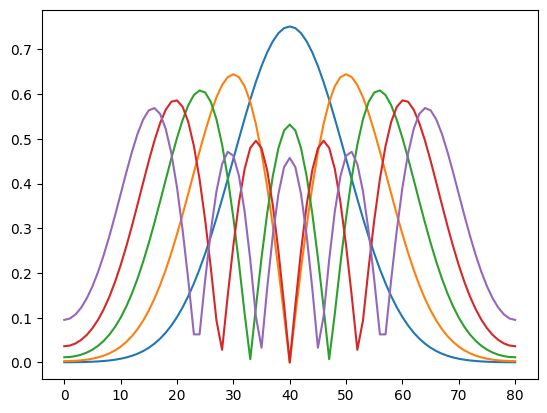

In [9]:
# Part b)
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigs

# Parameters
L = 4
K = 1
N = int((L + L) / 0.1 + 1)
x = np.linspace(-L, L, N)
dx = x[1] - x[0]

B = np.zeros((N - 2, N - 2))
for j in range(N - 2):
    B[j, j] = -2
for j in range(N - 3):
    B[j, j + 1] = 1
    B[j + 1, j] = 1
B[0, 1] = 2 / 3
B[-1, -2] = 2 / 3
B[0, 0] = -2 / 3
B[-1, -1] = -2 / 3
B = B / dx**2

P = np.zeros((N - 2, N - 2))
for j in range(N - 2):
    P[j, j] = K * (x[j + 1]**2)

linL = -B + P
eigen_val, eigen_fun = eigs(linL, k=5, which="SM")
eigen_val = np.real(eigen_val)


phi0 = np.array([4/3*eigen_fun[0, :] - 1/3*eigen_fun[1, :]])
phiN = np.array([4/3*eigen_fun[-1, :] - 1/3*eigen_fun[-2, :]])
eigen_fun = np.real(np.vstack([phi0, eigen_fun, phiN]))
print(eigen_fun.shape)

for i in range(5):
    norm = np.trapz(eigen_fun[:, i]**2, x)
    eigen_fun[:, i] = abs(eigen_fun[:, i] / np.sqrt(norm))  

A3 = eigen_fun
A4 = eigen_val
print(A3)
plt.plot(A3)

(41, 2)
[[1.10635766e-01 3.42979516e-01]
 [1.31429470e-01 3.80290457e-01]
 [1.55625523e-01 4.20298338e-01]
 [1.83290905e-01 4.61667507e-01]
 [2.14401682e-01 5.02862063e-01]
 [2.48823179e-01 5.42238220e-01]
 [2.86309974e-01 5.78044314e-01]
 [3.26505902e-01 6.08420795e-01]
 [3.69036730e-01 6.31522342e-01]
 [4.13260479e-01 6.45529961e-01]
 [4.58263690e-01 6.48549700e-01]
 [5.03127115e-01 6.39141082e-01]
 [5.46926595e-01 6.16335269e-01]
 [5.88733062e-01 5.79635054e-01]
 [6.27612539e-01 5.29014869e-01]
 [6.62626141e-01 4.64973232e-01]
 [6.92830070e-01 3.88665882e-01]
 [7.17275622e-01 3.01711236e-01]
 [7.35111491e-01 2.06173753e-01]
 [7.45946372e-01 1.04565328e-01]
 [7.49550190e-01 1.54698416e-04]
 [7.45860849e-01 1.04703472e-01]
 [7.34990607e-01 2.06208000e-01]
 [7.17226065e-01 3.01753292e-01]
 [6.93028179e-01 3.88786189e-01]
 [6.63032249e-01 4.65194384e-01]
 [6.28047927e-01 5.29306421e-01]
 [5.89058106e-01 5.79914898e-01]
 [5.47125643e-01 6.16553945e-01]
 [5.03261321e-01 6.39328982e-01]
 [

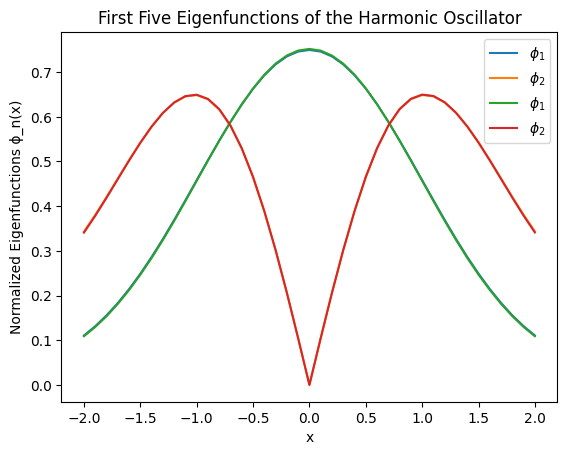

In [10]:
# Part c)
def bvp_rhs_c(x, y, epsilon, gamma):
    return [y[1], (gamma * y[0]**2 + x**2 - epsilon)*y[0]]

# Initialization
L = 2
xspan = np.arange(-L, L + 0.1, 0.1)
A = 0.1
k = 1
tol = 1e-4
gamma_vals = [0.05, -0.05]
epsilon_list = [0.1]
eps_fun = []
A6_temp = np.zeros(2)
A5_temp = np.zeros((41, 2))
A8_temp = np.zeros(2)
A7_temp = np.zeros((41, 2))

for gamma in gamma_vals:
    epsilon_start = epsilon_list[0]
    A = 1e-6
    for mode in range(1, 3):
        dA = 0.01
        for i in range(100):
            epsilon = epsilon_start
            depsilon = 0.2
            for j in range(100):
                y0 = [A, A * np.sqrt(k * L**2 - epsilon)]
                ysol = solve_ivp(lambda x, y: bvp_rhs_c(x, y, epsilon, gamma),
                            [xspan[0], xspan[-1]], y0, t_eval=xspan)
                y = ysol.y.T
                if abs(y[-1, 1] + np.sqrt(L**2 - epsilon) * y[-1, 0]) < tol:
                    # epsilon_list.append(epsilon)
                    # print(epsilon)
                    break
                if (-1) ** (mode+1) * (y[-1, 1] + np.sqrt(L**2 - epsilon) * y[-1, 0]) > 0:
                    epsilon += depsilon
                else:
                    epsilon -= depsilon
                    depsilon /= 2
            area = np.trapz(y[:, 0]**2, ysol.t)
            if abs(area - 1) < tol:
                break
            if area - 1 < 0:
                A += dA
            else:
                A = A - (dA/2)
                dA /= 2
        epsilon_start = epsilon + 0.2
        eps_fun.append(abs(y[:, 0]) / np.sqrt(area))
        plt.plot(xspan, eps_fun[-1], label=f'$\\phi_{mode}$')
        if gamma == 0.05:
            A6_temp[mode - 1] = (epsilon)
            A5_temp[:, mode - 1] = (np.abs(y[:, 0]))
        else:
            A8_temp[mode - 1] = (epsilon)
            A7_temp[:, mode - 1] = (np.abs(y[:, 0]))

A5 = A5_temp
A6 = A6_temp
A7 = A7_temp
A8 = A8_temp
print(A5.shape)
print(A5)
print(A7)
print("A6: ", A6)
print("A8: ", A8)
plt.xlabel('x')
plt.ylabel('Normalized Eigenfunctions ϕ_n(x)')
plt.title('First Five Eigenfunctions of the Harmonic Oscillator')
plt.legend()
plt.show()

In [11]:
# Part d)
def part_d_rhs(x, y, epsilon):
    return [y[1], (x**2 - epsilon) * y[0]]

# Parameters
L = 2
epsilon = 1
K = 1
A = 1
gamma = 0
y0 = [A, np.sqrt(L**2 - epsilon) * A]
x_span = [-L, L]
tols = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]

# Solvers to be tested
methods = ['RK45', 'RK23', 'Radau', 'BDF']
slopes = []

# Convergence study for each solver
def convergence_method(method, order):
    average_step_size = []
    for tol in tols:
        sol = solve_ivp(part_d_rhs, x_span, y0, method=method, args=(epsilon,), rtol=tol, atol=tol)
        step_sizes = np.diff(sol.t)
        average_step_size.append(np.mean(step_sizes))
    log_tols = np.log10(tols)
    log_avg_step_size = np.log10(average_step_size)
    slope, _ = np.polyfit(log_avg_step_size, log_tols, 1)
    slopes.append(slope)
    return slopes

# Plotting results for each method
for method in methods:
    if method == "RK45":
        order = 4
    elif method == "RK23" or "BDF":
        order = 3
    else:
        order = 5
    result = convergence_method(method, order)
A9 = np.array(result)
print(A9)

[5.24466756 3.01909953 4.03819927 6.45751261]


In [12]:
# Part f)
eigen_value_exact = np.array([1, 3, 5, 7, 9])
eig_rel_err_a = abs(A2 - eigen_value_exact) / eigen_value_exact * 100
eig_rel_err_b = abs(A4 - eigen_value_exact) / eigen_value_exact * 100

L = 4
dx = 0.1
K = 1
x = np.arange(-L, L+dx, dx)
def factorial(n):
    result = 1
    for i in range(1, n+1):
        result *=i
    return result

h = np.array([np.ones_like(x), 
              2 * x, 
              4 * x**2 - 2, 
              8 * x**3 - 12 * x, 
              16 * x**4 - 48 * x**2 + 12])

phi = np.zeros((81, 5))
for j in range(5):
    phi[:, j] = np.exp(-x**2 / 2) * h[j, :] / np.sqrt(factorial(j) * 2**j * np.sqrt(math.pi))

eigen_fun_err_a = np.zeros(5)
eigen_fun_err_b = np.zeros(5)
for i in range(5):
    eigen_fun_err_a[i] = np.trapz((abs(A1[:, i]) - abs(phi[:, i]))**2, x)
    eigen_fun_err_b[i] = np.trapz((abs(A3[:, i]) - abs(phi[:, i]))**2, x)

A10 = eigen_fun_err_a
A11 = eig_rel_err_a
A12 = eigen_fun_err_b
A13 = eig_rel_err_b


print("A1: ", A1)
print("A2: ", A2)
print("A3: ", A3)
print("A4: ", A4)
print("A5: ", A5)
print("A6: ", A6)
print("A7: ", A7)
print("A8: ", A8)
print("A9: ", A9)
print("A10: ", A10)
print("A11: ", A11)
print("A12: ", A12)
print("A13: ", A13)

A1:  [[ 2.52638135e-04  1.45263285e-03  5.65791032e-03  1.74251500e-02
   4.49739324e-02]
 [ 3.74361154e-04  2.08091497e-03  7.87411635e-03  2.34945619e-02
   5.85286264e-02]
 [ 5.49693592e-04  2.96478464e-03  1.08974131e-02  3.14959750e-02
   7.57133983e-02]
 [ 7.99574272e-04  4.19028063e-03  1.49550169e-02  4.18500929e-02
   9.70305135e-02]
 [ 1.15147827e-03  5.86546311e-03  2.03156260e-02  5.50071667e-02
   1.22893328e-01]
 [ 1.64186824e-03  8.12655207e-03  2.72920341e-02  7.14287820e-02
   1.53601124e-01]
 [ 2.31861693e-03  1.11444525e-02  3.62571792e-02  9.16073681e-02
   1.89281291e-01]
 [ 3.24129939e-03  1.51206910e-02  4.76086568e-02  1.15976003e-01
   2.29812179e-01]
 [ 4.48498071e-03  2.02874805e-02  6.17600443e-02  1.44840285e-01
   2.74657949e-01]
 [ 6.14581779e-03  2.69273203e-02  7.91314285e-02  1.78373616e-01
   3.22846337e-01]
 [ 8.33932660e-03  3.53568221e-02  1.00165635e-01  2.16551368e-01
   3.72969426e-01]
 [ 1.12000706e-02  4.59112681e-02  1.25213950e-01  2.5905557